<a href="https://colab.research.google.com/github/hamataro0710/kempo_motion_analysis/blob/master/motion_analysis_ja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 重心位置推定 with tf-open-pose
Estimate Center of Gravity program. English version notebook is [this](https://colab.research.google.com/drive/1kUVQSmWSJ3aBpbh83NNbUHbEA0IQqufy)

tf-open-poseを使った姿勢推定と、それによる重心位置推定です。
人ごとの踵の位置に破線を、重心位置に丸を表示します。
体の部位が隠れるとその部分の重量が計算されなくなります。

是非一緒に開発してpull requestをしてください。
[https://github.com/hamataro0710/kempo_motion_analysis](https://github.com/hamataro0710/kempo_motion_analysis). 


[picture like this](https://drive.google.com/file/d/1oDZnsO3D8qYKBytFmnlkrwVg_pMJ48i-/view?usp=sharing)

## Flow
以下を実行してください。
1. google driveに下のフォルダを作成して、画像や動画などを入れてください。
    - My Drive/data/picture (ここに写真を入れます)
    - My Drive/data/movie (ここに動画を入れます)
    <br>--- プログラムで自動的に以下のフォルダを作ります ---
    - My Drive/data/movie_estimated (at here, generated movies will be posted)
    - My Drive/data/png_estimated (at here, generated png will be posted)
    - My Drive/data/data_estimated (at here, generated data will be posted)
2. "shift + Enter"で実行します。
<br>(google driveとの接続の時は指示に従ってください。)
3. 動画に対してはだいたい元動画の30~180倍の時間がかかります。


## Costs, Licenses and so on.
1. 一切無料です。google colaboratoryで実行しています。説明は[こちら](https://colab.research.google.com/notebooks/welcome.ipynb)
2. 商用利用は禁止されています。Licenses depends on CMU OpenPose and tf-pose-estimation. <br>
https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/LICENSE(PERMITTED USES:  The Software may be used for your own noncommercial internal research purposes. You understand and agree that Licensor is not obligated to implement any suggestions and/or feedback you might provide regarding the Software, but to the extent Licensor does so, you are not entitled to any compensation related thereto.
)
---
# Now Let's Start !!

 ## 1. Connect to your google drive

(動画への推定では中間ファイルとして画像を生み出します。google driveの空き容量には注意ください。)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 2. プログラムをgithubから持ってきます。

In [0]:
!git clone --recursive https://github.com/hamataro0710/kempo_motion_analysis.git

Cloning into 'kempo-motion-analysis'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 240 (delta 27), reused 29 (delta 14), pack-reused 197
Receiving objects: 100% (240/240), 40.78 KiB | 1.10 MiB/s, done.
Resolving deltas: 100% (148/148), done.
Submodule 'tf-pose-estimation' (https://github.com/ildoonet/tf-pose-estimation.git) registered for path 'tf-pose-estimation'
Cloning into '/content/kempo-motion-analysis/tf-pose-estimation'...
remote: Enumerating objects: 11, done.        
remote: Counting objects: 100% (11/11), done.        
remote: Compressing objects: 100% (9/9), done.        
remote: Total 1312 (delta 3), reused 7 (delta 2), pack-reused 1301        
Receiving objects: 100% (1312/1312), 94.12 MiB | 1.92 MiB/s, done.
Resolving deltas: 100% (692/692), done.
Submodule path 'tf-pose-estimation': checked out 'dbc89c7c7efdf5aaf56b3bb0f53ef32ea3eaff76'


In [0]:
cd kempo-motion-analysis/

/content/kempo-motion-analysis


## 3. 環境設定

In [0]:
!bash start.sh

## 4. 姿勢推定の実行



### 4.1. 画像への推論
parameters
- imagefile: testpic.png のようにファイル名のみ(パス不要)
- path: path of your google drive
- cog: True/False, 骨格だけ欲しい場合は、Falseにしてください。
- cog_color: 重心位置を黒丸から変えたい時は色を'white'のように指定してください。
- resize:  default: "432x368".縦の写真や動画だと '368x432'.に変えてください。

「!python module_name.py --args」のようにmagic commandでの実行をお勧めします。
moduleで実行すると、grid lineが現れます。多分、google colabの仕様です。

In [0]:
!python estimate_image.py  --path='../drive/My Drive/data/picture/' --image='jump2.png' --resize="432x368"  --cog=True

[2019-03-16 10:48:21,461] [TfPoseEstimator] [INFO] loading graph from /content/kempo-motion-analysis/models/graph/cmu/graph_opt.pb(default size=432x368)
[2019-03-16 10:48:21,461] [TfPoseEstimator] [INFO] loading graph from /content/kempo-motion-analysis/models/graph/cmu/graph_opt.pb(default size=432x368)
2019-03-16 10:48:22.879958: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-03-16 10:48:22.880215: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x22d3ce0 executing computations on platform Host. Devices:
2019-03-16 10:48:22.880251: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
Instructions for updating:
Colocations handled automatically by placer.
[2019-03-16 10:48:47,473] [TfPoseEstimator] [DEBUG] shape of image: (1610, 2880, 3)
[2019-03-16 10:48:47,473] [TfPoseEstimator] [DEBUG] shape of image: (1610, 2880, 3)
2880 1610
[2019-03-16 10:48:47,473] [TfPoseEstimator] [DE

### 4.2 動画への実行

parameters
- video: 動画の名前
- path: path of your google drive
- cog: True/False, 骨格だけ欲しい場合は、Falseにしてください。
- cog_color: 重心位置を黒丸から変えたい時は色を'white'のように指定してください。
- resize:  default: "432x368".縦の写真や動画だと '368x432'.に変えてください。

「!python module_name.py --args」のようにmagic commandでの実行をお勧めします。
moduleで実行すると、grid lineが現れます。多分、google colabの仕様です。

In [0]:
!git pull origin master
!python estimate_video.py  --path='../drive/My Drive/data/' --video='test_short.mov' --resize="432x368"  --cog=True #--plot_image=False

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/hamataro0710/kempo-motion-analysis
 * branch            master     -> FETCH_HEAD
   c4b8887..36db306  master     -> origin/master
Updating c4b8887..36db306
Fast-forward
 estimate_video.py | 6 +++---
 1 file changed, 3 insertions(+), 3 deletions(-)
[2019-03-17 09:28:47,361] [TfPoseEstimator] [INFO] loading graph from /content/kempo-motion-analysis/models/graph/cmu/graph_opt.pb(default size=432x368)
2019-03-17 09:28:48.436510: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-03-17 09:28:48.436763: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x27d1b80 executing computations on platform Host. Devices:
2019-03-17 09:28:48.436796: I tensorflow/compiler/xla/service/service.cc:158]   Str

##モジュールで実行する場合

[2019-03-17 08:41:53,014] [TfPoseEstimator] [INFO] loading graph from /content/kempo-motion-analysis/models/graph/cmu/graph_opt.pb(default size=432x368)
[INFO] loading graph from /content/kempo-motion-analysis/models/graph/cmu/graph_opt.pb(default size=432x368)
[2019-03-17 08:41:53,014] [TfPoseEstimator] [INFO] loading graph from /content/kempo-motion-analysis/models/graph/cmu/graph_opt.pb(default size=432x368)
[2019-03-17 08:41:53,014] [TfPoseEstimator] [INFO] loading graph from /content/kempo-motion-analysis/models/graph/cmu/graph_opt.pb(default size=432x368)
[INFO] loading graph from /content/kempo-motion-analysis/models/graph/cmu/graph_opt.pb(default size=432x368)
[INFO] loading graph from /content/kempo-motion-analysis/models/graph/cmu/graph_opt.pb(default size=432x368)
[INFO] loading graph from /content/kempo-motion-analysis/models/graph/cmu/graph_opt.pb(default size=432x368)
[2019-03-17 08:42:23,851] [TfPoseEstimator] [INFO] inference image: ../drive/My Drive/data/picture/jump2.

[[[0.7916666666666666, 0.33152173913043476, 0.8380377888679504], [0.7962962962962963, 0.358695652173913, 0.8415454030036926], [0.7731481481481481, 0.358695652173913, 0.7497493028640747], [0.7638888888888888, 0.3967391304347826, 0.800906777381897], [0.7777777777777778, 0.42391304347826086, 0.9436975717544556], [0.8194444444444444, 0.358695652173913, 0.8067660927772522], [0.8333333333333334, 0.3967391304347826, 0.5115369558334351], [0.8148148148148148, 0.42391304347826086, 0.6597456932067871], [0.7870370370370371, 0.41847826086956524, 0.8771244287490845], [nan, nan, 0], [nan, nan, 0], [0.8240740740740741, 0.41847826086956524, 0.7217444181442261], [0.8842592592592593, 0.42934782608695654, 0.5462319850921631], [0.8888888888888888, 0.45108695652173914, 0.3297540247440338], [0.7824074074074074, 0.33152173913043476, 0.882269561290741], [0.7962962962962963, 0.32608695652173914, 0.825735330581665], [0.7824074074074074, 0.33152173913043476, 0.7728800773620605], [0.8009259259259259, 0.33152173913

/content/kempo-motion-analysis/modules/humans_to_array.py:41: RuntimeWarning: invalid value encountered in true_divide
  seg_cog = (np.dot(rates, segments[:, :2])) / sum(rates)


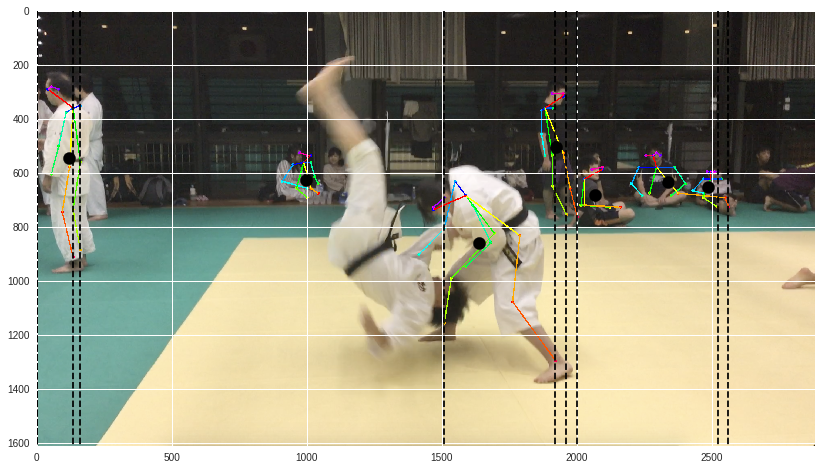

In [0]:
import estimate_image
estimate_image.estimate_image(imagefile='jump2.png', model='cmu', path = '../drive/My Drive/data/picture/', cog=True, plt_network=False, resize_out_ratio = 4.0, resize="432x368")